In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from linear_reassignment import create_reassigned_representation, plot_spectogram
import IPython.display as ipd

My goal in generating synthetic data is to continue building up my intuition on what the linear reassignment is doing. I also want to verify that I got the values on the axes correct, meaning of linear reassignment parameters right, etc.


Let's start with something straightforward.

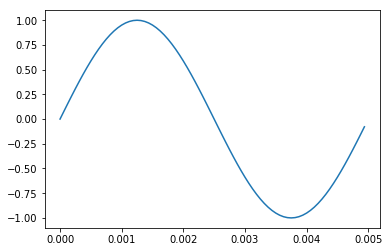

In [2]:
sr = 16000
freq = 200

def generate_signal(freq=200):
    t = np.linspace(0, 1, num=sr) # we will be looking at 1 second of signal sampled @ sr
    return np.sin(2*np.pi*t*freq).reshape(-1,1), t

signal, t = generate_signal()
plt.plot(t[:80], signal[:80])

In [3]:
ipd.Audio(signal.reshape(-1), rate=16000)

In [4]:
minf = 100/sr
maxf = 400/sr
tdeci = 100
q = 0.5

In [5]:
%%time

spec = create_reassigned_representation(signal, q, tdeci, 1, 40, minf, maxf)

CPU times: user 1.58 s, sys: 51.4 ms, total: 1.63 s
Wall time: 272 ms


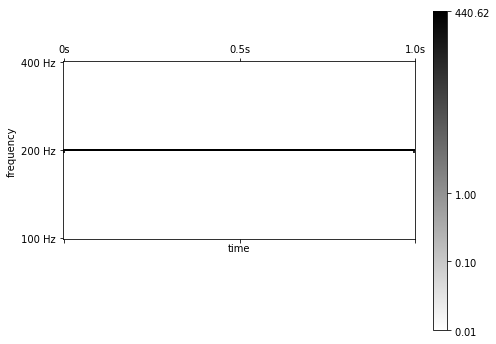

In [6]:
plot_spectogram(spec, sr, minf, maxf, tdeci)

When working with such well behaved tonal sounds, changing the shape of the wavelet has no effect.

In [7]:
q = 7 # previously 0.5

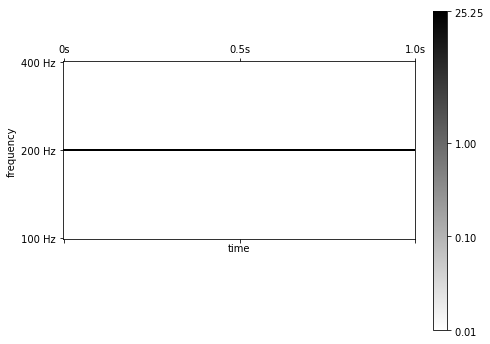

In [8]:
spec = create_reassigned_representation(signal, q, tdeci, 1, 40, minf, maxf)
plot_spectogram(spec, sr, minf, maxf, tdeci)

But if we move to impulsive sounds, things become more nuanced.

In [9]:
def impulse(x):
    if x < 0.05: return 20 * x
    if x < 0.1: return 20 * (0.1 - x)
    return 0

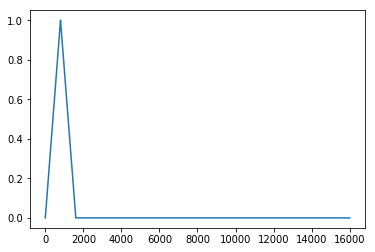

In [10]:
imp = np.array([impulse(tt) for tt in t])[:, None]
plt.plot(imp)

In [11]:
imp = imp * generate_signal(freq=300)[0]

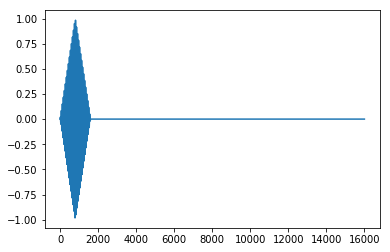

In [12]:
plt.plot(imp)

In [13]:
ipd.Audio(imp.squeeze(), rate=16000)

What is the impact of the `q` parameter (controlling the shape of the wavelet used for analyzing the data) when working with impulsive sounds?

With a low `q`, we pick up on the entirety of the sound.

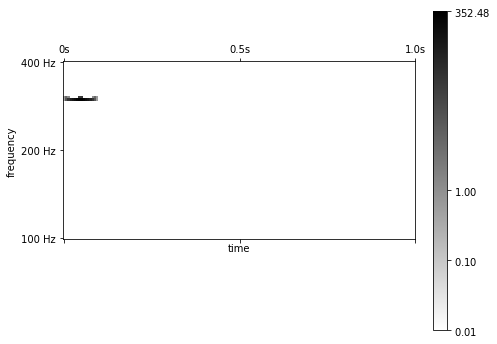

In [14]:
q = 0.5
spec = create_reassigned_representation(imp, q, tdeci, 1, 40, minf, maxf)
plot_spectogram(spec, sr, minf, maxf, tdeci)

With a higher q, we pick up more precisely when the click occurs. Note also that the range of values appearing in the spectogram is now much narrower.

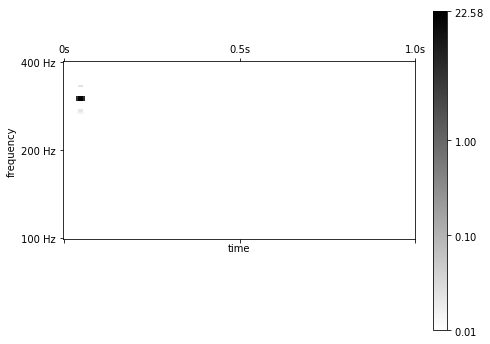

In [15]:
q = 8
spec = create_reassigned_representation(imp, q, tdeci, 1, 40, minf, maxf)
plot_spectogram(spec, sr, minf, maxf, tdeci)

What if we combine the signals and use a low `q`?

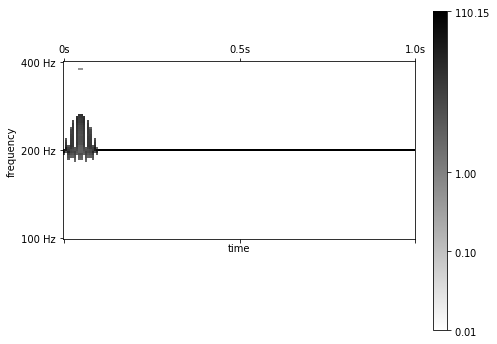

In [16]:
q = 0.5
spec = create_reassigned_representation((signal+imp)/2, q, tdeci, 1, 40, minf, maxf)
plot_spectogram(spec, sr, minf, maxf, tdeci)

With a high `q`

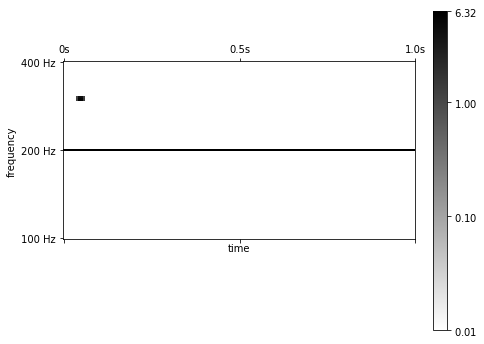

In [17]:
q = 8
spec = create_reassigned_representation((signal+imp)/2, q, tdeci, 1, 40, minf, maxf)
plot_spectogram(spec, sr, minf, maxf, tdeci)

With a low `q` we pick up on the clicks much better. High `q` zones in better on tones - signals that are more consistent across time.

The effect of the `q` parameter becomes even more pronounced if we zoom in to the area of interest.

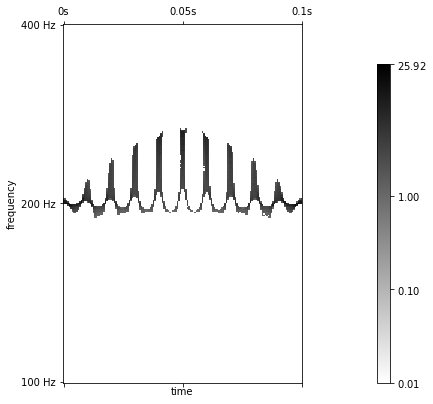

In [18]:
q = 0.5
tdeci = 10

spec = create_reassigned_representation(((signal+imp)/2)[:1600], q, tdeci, 1, 120, minf, maxf)
plot_spectogram(spec, sr, minf, maxf, tdeci)

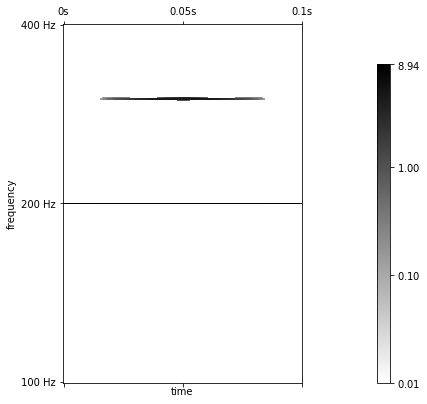

In [19]:
q = 2
tdeci = 10

spec = create_reassigned_representation(((signal+imp)/2)[:1600], q, tdeci, 1, 120, minf, maxf)
plot_spectogram(spec, sr, minf, maxf, tdeci)